In [1]:
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import HSNE.tools as hsne_tl
import HSNE.plotting as hsne_pl

import HUMAP.tools as humap_tl
import HUMAP.plotting as humap_pl

import os.path

In [2]:
# Load Dataset
print("Loading dataset")
filelocation = r"datasets/5_percent_of_big_dataset.h5ad"
adata = anndata.read_h5ad(filelocation)
print(f"Dataset with {len(adata)} cells loaded")


Loading dataset
Dataset with 868259 cells loaded


**HUMAP subsampling vs random subsampling**

A dataset will be reduced to a fraction of its original size using the random subsampling method from scanpy and the HUMAP subsampling method.

subsampling randomly
done
subsampling with humap one scale
-----
Calculating scale 0
Cutting data at point 8682
Calculating scale 0 with 8682 cells


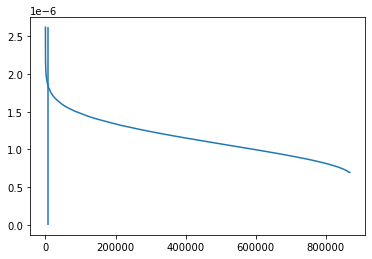

adata_humap_sub with 8682 cells
subsampling with humap two scales
-----
Calculating scale 0
Cutting data at point 86825
Calculating scale 0 with 86825 cells


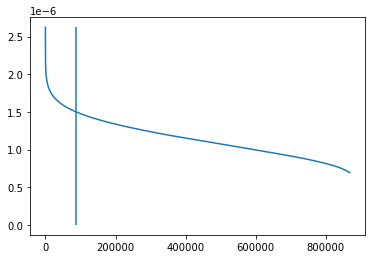

-----
Calculating scale 1
Cutting data at point 8682
Calculating scale 1 with 8682 cells


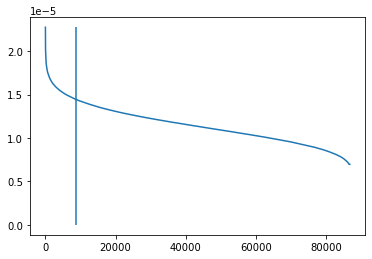

adata_humap2_sub with 8682 cells
subsampling with humap three scales
-----
Calculating scale 0
Cutting data at point 187060
Calculating scale 0 with 187060 cells


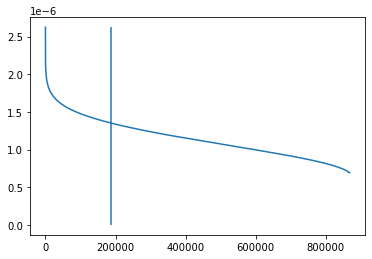

-----
Calculating scale 1
Cutting data at point 40300
Calculating scale 1 with 40300 cells


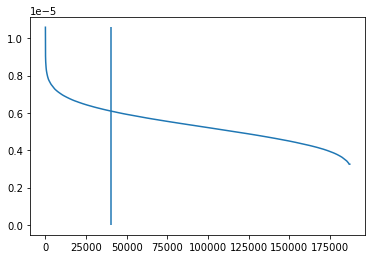

-----
Calculating scale 2
Cutting data at point 8682
Calculating scale 2 with 8682 cells


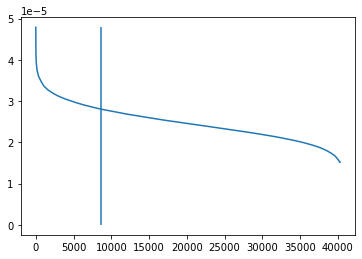

adata_humap3_sub with 8682 cells
done


In [3]:
adata_rand_sub = adata.copy()


subsampling_factor = 0.01

# random subsampling
print("subsampling randomly")
sc.pp.subsample(adata_rand_sub, subsampling_factor)
sc.pp.neighbors(adata_rand_sub, n_neighbors=20)
print("done")

# humap subsampling
print("subsampling with humap one scale")
humap_tl.humap(adata, subs_mode="factor", factor=subsampling_factor, verbose=True)
adata_humap_sub = adata.uns["HUMAP_scales"][-1].copy()
print(f"adata_humap_sub with {len(adata_humap_sub)} cells")

# second scale
print("subsampling with humap two scales")
humap_tl.humap(adata, subs_mode="factor", n_scales=2, factor=np.sqrt(subsampling_factor), verbose=True)
adata_humap2_sub = adata.uns["HUMAP_scales"][-1].copy()
print(f"adata_humap2_sub with {len(adata_humap2_sub)} cells")

# third scale
print("subsampling with humap three scales")
humap_tl.humap(adata, subs_mode="factor", n_scales=3, factor=np.power(subsampling_factor, 1/3), verbose=True)
adata_humap3_sub = adata.uns["HUMAP_scales"][-1].copy()
print(f"adata_humap3_sub with {len(adata_humap3_sub)} cells")

print("done")

Helper function, that shows test results

In [4]:
def printData(anndata_obj):
    # getting clustercounts
    if 'umap' not in anndata_obj.obsm:
        sc.tl.umap(anndata_obj) 
    sc.pl.umap(anndata_obj, color="louv_05", edges=True)
    clustercount = anndata_obj.obs["louv_05"].value_counts()
    plt.bar(np.arange(clustercount.count()), clustercount)
    plt.xticks(np.arange(clustercount.count()))
    
    cellcount = anndata_obj.X.shape[0]
    
    print(f"total cellcount: {cellcount}")
    plt.show()
    sc.tl.paga(anndata_obj, "louv_05")
    sc.pl.paga(anndata_obj)


***The original dataset:***
(not subsampled)

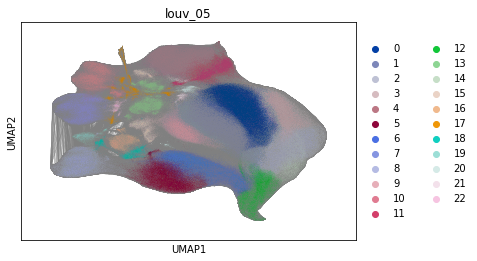

total cellcount: 868259


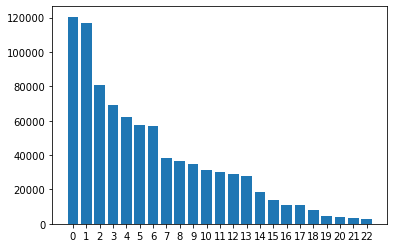

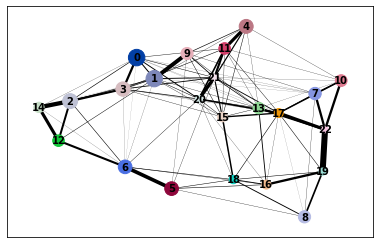

In [5]:
printData(adata)

***Subsampled with the random subsampling method***

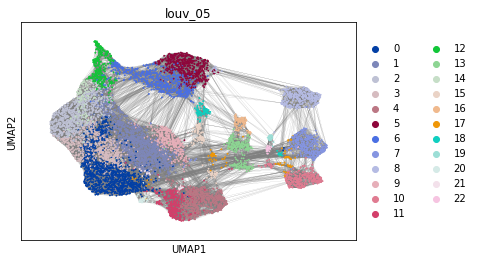

total cellcount: 8682


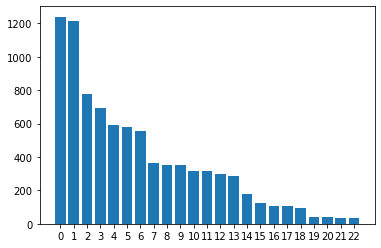

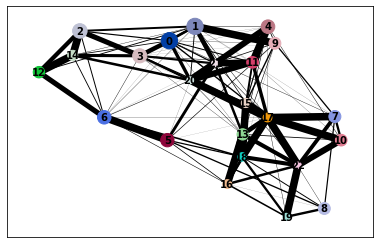

In [6]:
printData(adata_rand_sub)

***Subsampled with the HUMAP subsampling method***

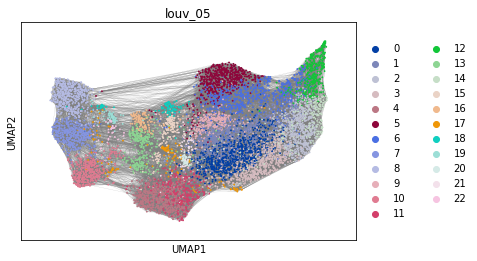

total cellcount: 8682


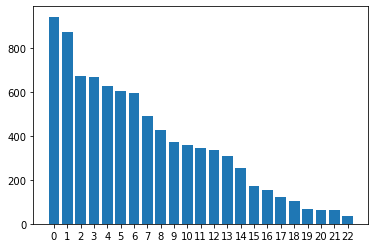

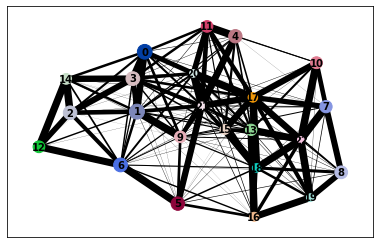

In [7]:
printData(adata_humap_sub)

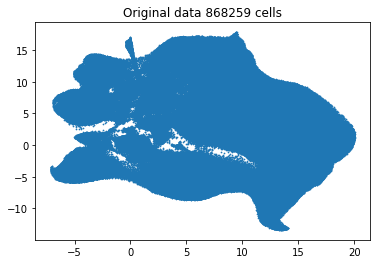

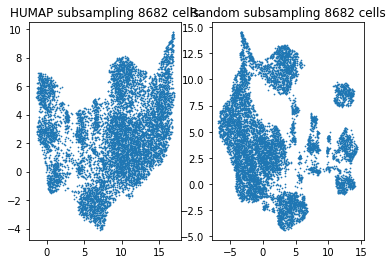

In [8]:
if 'umap' not in adata.obsm:
    sc.tl.umap(adata) 
plt.scatter(x=adata.obsm['X_umap'][:,0], y=adata.obsm['X_umap'][:,1], s=0.5)
plt.title(f'Original data {len(adata)} cells')
plt.show()

plt.subplot(1, 2, 1)
plt.title(f'HUMAP subsampling {len(adata_humap_sub)} cells')
plt.scatter(x=adata_humap_sub.obsm['X_umap'][:,0], y=adata_humap_sub.obsm['X_umap'][:,1], s=0.5)
plt.subplot(1, 2, 2)
plt.title(f'Random subsampling {len(adata_rand_sub)} cells')
plt.scatter(x=adata_rand_sub.obsm['X_umap'][:,0], y=adata_rand_sub.obsm['X_umap'][:,1], s=0.5)
plt.show()

**Comparing connectivities**

Cluster distribution

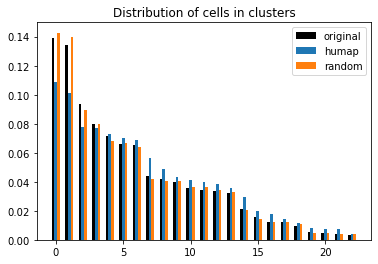

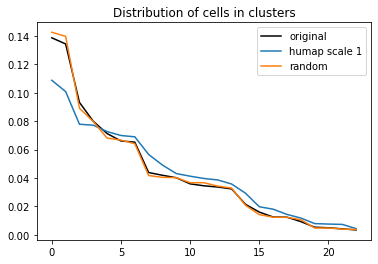

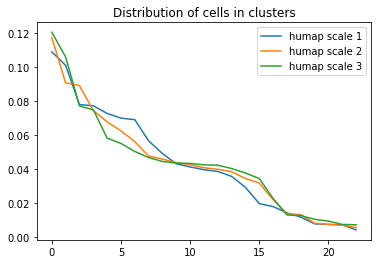

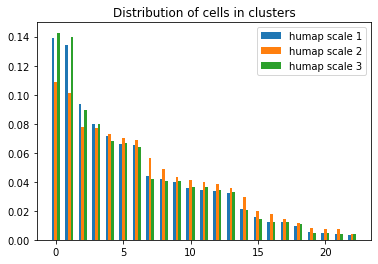

In [9]:
orig_clustercount  = adata.obs["louv_05"].value_counts()
orig_clustercount /= np.sum(orig_clustercount)

humap_clustercount = adata_humap_sub.obs["louv_05"].value_counts()
humap_clustercount /= np.sum(humap_clustercount)

humap2_clustercount = adata_humap2_sub.obs["louv_05"].value_counts()
humap2_clustercount /= np.sum(humap2_clustercount)

humap3_clustercount = adata_humap3_sub.obs["louv_05"].value_counts()
humap3_clustercount /= np.sum(humap3_clustercount)

rand_clustercount  = adata_rand_sub.obs["louv_05"].value_counts()
rand_clustercount /= np.sum(rand_clustercount)


barwidth = 0.2
plt.bar(np.arange(orig_clustercount.count())-barwidth, orig_clustercount, barwidth, label="original", color="black")
plt.bar(np.arange(humap_clustercount.count()), humap_clustercount, barwidth , label="humap")
plt.bar(np.arange(rand_clustercount.count())+barwidth, rand_clustercount, barwidth, label="random")
plt.legend()
plt.title("Distribution of cells in clusters")
plt.show()

plt.plot(np.arange(orig_clustercount.count()), orig_clustercount, label="original", color="black")
plt.plot(np.arange(humap_clustercount.count()), humap_clustercount , label="humap scale 1")
plt.plot(np.arange(rand_clustercount.count()), rand_clustercount, label="random")
plt.legend()
plt.title("Distribution of cells in clusters")
plt.show()

plt.plot(np.arange(humap_clustercount.count()), humap_clustercount, label="humap scale 1")
plt.plot(np.arange(humap2_clustercount.count()), humap2_clustercount , label="humap scale 2")
plt.plot(np.arange(humap3_clustercount.count()), humap3_clustercount, label="humap scale 3")
plt.legend()
plt.title("Distribution of cells in clusters")
plt.show()

barwidth = 0.2
plt.bar(np.arange(humap_clustercount.count())-barwidth, orig_clustercount, barwidth, label="humap scale 1")
plt.bar(np.arange(humap2_clustercount.count()), humap_clustercount, barwidth , label="humap scale 2")
plt.bar(np.arange(humap3_clustercount.count())+barwidth, rand_clustercount, barwidth, label="humap scale 3")
plt.legend()
plt.title("Distribution of cells in clusters")
plt.show()


Similarity of cluster distribution (the smaller, the more similar)

In [10]:
print("Original vs Random")
print(np.linalg.norm(orig_clustercount-rand_clustercount))
print("Original vs Humap scale 1")
print(np.linalg.norm(orig_clustercount-humap_clustercount))
print("Original vs Humap scale 2")
print(np.linalg.norm(orig_clustercount-humap2_clustercount))
print("Original vs Humap scale 3")
print(np.linalg.norm(orig_clustercount-humap3_clustercount))

Original vs Random
0.009819989251171165
Original vs Humap scale 1
0.056896430369268086
Original vs Humap scale 2
0.0722313885100268
Original vs Humap scale 3
0.09534192525973963
